In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
mcu=pd.read_csv("Marvel_Cinematic_Universe_Movies.csv")

In [3]:
mcu.head()

,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office
0,"May 7, 2027",Avengers: Secret Wars,NaN,NaN,NaN,NaN
1,"Nov 6, 2026",Untitled Marvel Movie,NaN,NaN,NaN,NaN
2,"Jul 24, 2026",Untitled Marvel Movie,NaN,NaN,NaN,NaN
3,"May 1, 2026",Avengers: The Kang Dynasty,NaN,NaN,NaN,NaN
4,"Feb 13, 2026",Untitled Marvel Movie,NaN,NaN,NaN,NaN


In [4]:
mcu.isnull().sum()

Release Date             1
Title                    2
Production Budget       12
Opening Weekend         13
Domestic Box Office     12
Worldwide Box Office    12
dtype: int64

In [5]:
mcu_clean=mcu.dropna()

In [6]:
mcu_clean.isnull().sum()

Release Date            0
Title                   0
Production Budget       0
Opening Weekend         0
Domestic Box Office     0
Worldwide Box Office    0
dtype: int64

In [7]:
mcu_clean.describe()

,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office
count,33,33,33,33,33,33
unique,33,33,17,33,33,33
top,"Nov 10, 2023",The Marvels,"$200,000,000","$46,110,859","$84,500,223","$199,706,250"
freq,1,1,8,1,1,1


In [8]:
mcu_clean.shape

(33, 6)

In [9]:
mcu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Release Date          46 non-null     object
 1   Title                 45 non-null     object
 2   Production Budget     35 non-null     object
 3   Opening Weekend       34 non-null     object
 4   Domestic Box Office   35 non-null     object
 5   Worldwide Box Office  35 non-null     object
dtypes: object(6)
memory usage: 2.3+ KB


In [10]:
mcu_clean.columns

Index(['Release Date', 'Title', 'Production Budget', 'Opening Weekend',
       'Domestic Box Office', 'Worldwide Box Office'],
      dtype='object')

In [11]:
#cleaning data
columns=[ 'Production Budget', 'Opening Weekend',
       'Domestic Box Office', 'Worldwide Box Office']
for col in columns:
    mcu_clean.loc[:,col]=mcu_clean[col].str.replace('[/$,]',"", regex =True )
    mcu_clean.loc[:,col]= pd.to_numeric(mcu_clean[col], errors = "coerce")
    mcu_clean.loc[:,col]=mcu_clean[col] / 1000000


In [12]:
mcu_clean.head()

,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office
10,"Nov 10, 2023",The Marvels,274.8,46.110859,84.500223,199.70625
11,"May 5, 2023",Guardians of the Galaxy Vol 3,250.0,118.414021,358.995815,845.468744
12,"Feb 17, 2023",Ant-Man and the Wasp: Quant…,200.0,106.10965,214.506909,463.635303
13,"Nov 11, 2022",Black Panther: Wakanda Forever,250.0,181.339761,453.82906,853.985546
15,"Jul 8, 2022",Thor: Love and Thunder,250.0,144.165107,343.25683,760.928081


In [13]:
#converting clean data to csv
mcu_clean.to_csv("mcu_clean.csv")

In [14]:
mcu_new=pd.read_csv("mcu_clean.csv")

In [15]:
mcu_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            33 non-null     int64  
 1   Release Date          33 non-null     object 
 2   Title                 33 non-null     object 
 3   Production Budget     33 non-null     float64
 4   Opening Weekend       33 non-null     float64
 5   Domestic Box Office   33 non-null     float64
 6   Worldwide Box Office  33 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.9+ KB


In [16]:
#finding maximum gross box office worldwide
max_worldwide=mcu_new["Worldwide Box Office" ].max()

In [17]:
max_worldwide

2788.912285

In [18]:
#finding minimum gross box office worldwide
min_worldwide=mcu_new["Worldwide Box Office" ].min()
min_worldwide


199.70625

In [19]:
max_index=mcu_new["Worldwide Box Office" ].idxmax()
max_index

11

In [20]:
min_index=mcu_new["Worldwide Box Office" ].idxmin()
min_index



0

In [21]:
mcu_new.loc[max_index]

Unnamed: 0                             22
Release Date                 Apr 26, 2019
Title                   Avengers: Endgame
Production Budget                   400.0
Opening Weekend                357.115007
Domestic Box Office               858.373
Worldwide Box Office          2788.912285
Name: 11, dtype: object

In [22]:
mcu_new.loc[min_index]

Unnamed: 0                        10
Release Date            Nov 10, 2023
Title                    The Marvels
Production Budget              274.8
Opening Weekend            46.110859
Domestic Box Office        84.500223
Worldwide Box Office       199.70625
Name: 0, dtype: object

In [23]:
#find the movie title with maximum and minimum gross profit
mcu_new.loc[max_index,"Title"]
mcu_new.loc[min_index,"Title"]

'The Marvels'

In [24]:
#highest opening weekend of highest grossing movie.
max_opening_weekend=mcu_new.loc[max_index,"Opening Weekend"]
max_opening_weekend


357.115007

In [25]:
#highest opening weekend of highest grossing movie.
min_opening_weekend=mcu_new.loc[min_index,"Opening Weekend"]
min_opening_weekend



46.110859

In [26]:
#film at the top position.
top_position=mcu_new.loc[max_index,"Title"]
top_position


'Avengers: Endgame'

In [27]:
#worldwide gross collection of all movies
worldwide_collection=mcu_new["Worldwide Box Office"].sum()
worldwide_collection

29748.525015000003

In [28]:
#average worldwide gross collection
worldwide_collection=mcu_new["Worldwide Box Office"].mean()
worldwide_collection


901.4704550000001

In [29]:
#total domestic gross box office.
domestic_collection=mcu_new["Domestic Box Office"].sum()
domestic_collection

11799.569158

In [30]:
#average domestic gross collection
domestic_avg=mcu_new["Domestic Box Office"].mean()
domestic_avg

357.5627017575758

In [31]:
#sort according to release date.
mcu_new["Release Date"]=pd.to_datetime(mcu_new["Release Date"])
release_date=mcu_new.sort_values(by="Release Date")
release_date

,Unnamed: 0,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office
32,43,2008-05-02,Iron Man,186.0,102.118668,318.604126,585.171547
31,42,2008-06-13,The Incredible Hulk,137.5,55.414050,134.806913,265.573859
30,41,2010-05-07,Iron Man 2,170.0,128.122480,312.433331,621.156389
29,40,2011-05-06,Thor,150.0,65.723338,181.030624,449.326618
28,39,2011-07-22,Captain America: The First …,140.0,65.058524,176.654505,370.569776
27,38,2012-05-04,The Avengers,225.0,207.438708,623.357910,1515.100211
26,37,2013-05-03,Iron Man 3,200.0,174.144585,408.992272,1215.392272
25,36,2013-11-08,Thor: The Dark World,150.0,85.737841,206.362140,644.602516
24,35,2014-04-04,Captain America: The Winter…,170.0,95.023721,259.746958,714.401889
23,34,2014-08-01,Guardians of the Galaxy,170.0,94.320883,333.714112,770.882395


In [32]:
#movies with gross more than 1 billion.
more_than_billion=mcu_new[mcu_new["Worldwide Box Office"]>1000]
more_than_billion


,Unnamed: 0,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office
6,17,2021-12-17,Spider-Man: No Way Home,200.0,260.138569,814.115070,1907.836254
10,21,2019-07-02,Spider-Man: Far From Home,160.0,92.579212,390.532085,1132.107522
11,22,2019-04-26,Avengers: Endgame,400.0,357.115007,858.373000,2788.912285
12,23,2019-03-08,Captain Marvel,175.0,153.433423,426.829839,1129.576094
14,25,2018-04-27,Avengers: Infinity War,300.0,257.698183,678.815482,2048.359754
15,26,2018-02-16,Black Panther,200.0,202.003951,700.059566,1336.494320
20,31,2016-05-06,Captain America: Civil War,250.0,179.139142,408.084349,1151.899586
22,33,2015-05-01,Avengers: Age of Ultron,365.0,191.271109,459.005868,1395.316979
26,37,2013-05-03,Iron Man 3,200.0,174.144585,408.992272,1215.392272
27,38,2012-05-04,The Avengers,225.0,207.438708,623.357910,1515.100211


In [33]:
#movies with worlwide over 1 billion and opening more than 200
movies_opening_200= mcu_new[(mcu_new["Worldwide Box Office"]>1000) &( mcu_new["Opening Weekend"]>200)]
movies_opening_200


,Unnamed: 0,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office
6,17,2021-12-17,Spider-Man: No Way Home,200.0,260.138569,814.115070,1907.836254
11,22,2019-04-26,Avengers: Endgame,400.0,357.115007,858.373000,2788.912285
14,25,2018-04-27,Avengers: Infinity War,300.0,257.698183,678.815482,2048.359754
15,26,2018-02-16,Black Panther,200.0,202.003951,700.059566,1336.494320
27,38,2012-05-04,The Avengers,225.0,207.438708,623.357910,1515.100211


In [34]:
#sort movies by title
sort_by_title=mcu_new.sort_values(by="Title")
sort_by_title


,Unnamed: 0,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office
21,32,2015-07-17,Ant-Man,130.0,57.225526,180.202163,518.858449
13,24,2018-07-06,Ant-Man and the Wasp,130.0,75.812205,216.648740,623.144660
2,12,2023-02-17,Ant-Man and the Wasp: Quant…,200.0,106.109650,214.506909,463.635303
22,33,2015-05-01,Avengers: Age of Ultron,365.0,191.271109,459.005868,1395.316979
11,22,2019-04-26,Avengers: Endgame,400.0,357.115007,858.373000,2788.912285
14,25,2018-04-27,Avengers: Infinity War,300.0,257.698183,678.815482,2048.359754
15,26,2018-02-16,Black Panther,200.0,202.003951,700.059566,1336.494320
3,13,2022-11-11,Black Panther: Wakanda Forever,250.0,181.339761,453.829060,853.985546
9,20,2021-07-09,Black Widow,200.0,80.366312,183.651655,379.751131
20,31,2016-05-06,Captain America: Civil War,250.0,179.139142,408.084349,1151.899586


In [35]:
#movie with lowest opening weekend.
lowest_opening= mcu_new.loc[mcu_new["Opening Weekend"].idxmin(),"Title"]
lowest_opening





'The Marvels'

In [36]:
#movie with highest opening weekend.

highest_opening = mcu_new.loc[mcu_new["Opening Weekend"].idxmax(),"Title"]
highest_opening


'Avengers: Endgame'

In [37]:
#ratio of domestic box office to opening ratio
mcu_new["domestic_opening_ratio"]= mcu_new["Domestic Box Office"] / mcu_new["Opening Weekend"]
mcu_new.head()

,Unnamed: 0,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office,domestic_opening_ratio
0,10,2023-11-10,The Marvels,274.8,46.110859,84.500223,199.706250,1.832545
1,11,2023-05-05,Guardians of the Galaxy Vol 3,250.0,118.414021,358.995815,845.468744,3.031700
2,12,2023-02-17,Ant-Man and the Wasp: Quant…,200.0,106.109650,214.506909,463.635303,2.021559
3,13,2022-11-11,Black Panther: Wakanda Forever,250.0,181.339761,453.829060,853.985546,2.502645
4,15,2022-07-08,Thor: Love and Thunder,250.0,144.165107,343.256830,760.928081,2.380998


In [38]:
#ratio of Worldwide Box Office office to opening ratio
mcu_new["worldwide_opening_ratio"]= mcu_new["Worldwide Box Office"] / mcu_new["Opening Weekend"]
mcu_new.head()

,Unnamed: 0,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office,domestic_opening_ratio,worldwide_opening_ratio
0,10,2023-11-10,The Marvels,274.8,46.110859,84.500223,199.706250,1.832545,4.331003
1,11,2023-05-05,Guardians of the Galaxy Vol 3,250.0,118.414021,358.995815,845.468744,3.031700,7.139938
2,12,2023-02-17,Ant-Man and the Wasp: Quant…,200.0,106.109650,214.506909,463.635303,2.021559,4.369398
3,13,2022-11-11,Black Panther: Wakanda Forever,250.0,181.339761,453.829060,853.985546,2.502645,4.709312
4,15,2022-07-08,Thor: Love and Thunder,250.0,144.165107,343.256830,760.928081,2.380998,5.278171


In [39]:
#ratio of Worldwide Box Office office to Domestic Box Office

mcu_new["worldwide_domestic_opening_ratio"]= mcu_new["Worldwide Box Office"] / mcu_new["Domestic Box Office"]
mcu_new.head()

,Unnamed: 0,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office,domestic_opening_ratio,worldwide_opening_ratio,worldwide_domestic_opening_ratio
0,10,2023-11-10,The Marvels,274.8,46.110859,84.500223,199.706250,1.832545,4.331003,2.363381
1,11,2023-05-05,Guardians of the Galaxy Vol 3,250.0,118.414021,358.995815,845.468744,3.031700,7.139938,2.355094
2,12,2023-02-17,Ant-Man and the Wasp: Quant…,200.0,106.109650,214.506909,463.635303,2.021559,4.369398,2.161400
3,13,2022-11-11,Black Panther: Wakanda Forever,250.0,181.339761,453.829060,853.985546,2.502645,4.709312,1.881734
4,15,2022-07-08,Thor: Love and Thunder,250.0,144.165107,343.256830,760.928081,2.380998,5.278171,2.216789


In [40]:
sort_by_ratio=mcu_new.sort_values(by="worldwide_domestic_opening_ratio")
sort_by_ratio


,Unnamed: 0,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office,domestic_opening_ratio,worldwide_opening_ratio,worldwide_domestic_opening_ratio
32,43,2008-05-02,Iron Man,186.0,102.118668,318.604126,585.171547,3.119940,5.730309,1.836673
3,13,2022-11-11,Black Panther: Wakanda Forever,250.0,181.339761,453.829060,853.985546,2.502645,4.709312,1.881734
15,26,2018-02-16,Black Panther,200.0,202.003951,700.059566,1336.494320,3.465574,6.616179,1.909115
8,19,2021-09-03,Shang-Chi and the Legend of…,150.0,75.388688,224.543292,432.224634,2.978475,5.733282,1.924906
31,42,2008-06-13,The Incredible Hulk,137.5,55.414050,134.806913,265.573859,2.432721,4.792537,1.970031
30,41,2010-05-07,Iron Man 2,170.0,128.122480,312.433331,621.156389,2.438552,4.848145,1.988125
9,20,2021-07-09,Black Widow,200.0,80.366312,183.651655,379.751131,2.285182,4.725253,2.067780
28,39,2011-07-22,Captain America: The First …,140.0,65.058524,176.654505,370.569776,2.715317,5.695945,2.097709
2,12,2023-02-17,Ant-Man and the Wasp: Quant…,200.0,106.109650,214.506909,463.635303,2.021559,4.369398,2.161400
4,15,2022-07-08,Thor: Love and Thunder,250.0,144.165107,343.256830,760.928081,2.380998,5.278171,2.216789


In [41]:
#Create new columns to donate domestic and overseas percentage share in box office
mcu_new['domestic_%_share'] = (mcu_new['Domestic Box Office'] / mcu_new['Worldwide Box Office']) * 100
mcu_new['overseas_%_share'] = 100 - mcu_new['domestic_%_share']
mcu_new.head()


,Unnamed: 0,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office,domestic_opening_ratio,worldwide_opening_ratio,worldwide_domestic_opening_ratio,domestic_%_share,overseas_%_share
0,10,2023-11-10,The Marvels,274.8,46.110859,84.500223,199.706250,1.832545,4.331003,2.363381,42.312258,57.687742
1,11,2023-05-05,Guardians of the Galaxy Vol 3,250.0,118.414021,358.995815,845.468744,3.031700,7.139938,2.355094,42.461157,57.538843
2,12,2023-02-17,Ant-Man and the Wasp: Quant…,200.0,106.109650,214.506909,463.635303,2.021559,4.369398,2.161400,46.266302,53.733698
3,13,2022-11-11,Black Panther: Wakanda Forever,250.0,181.339761,453.829060,853.985546,2.502645,4.709312,1.881734,53.142476,46.857524
4,15,2022-07-08,Thor: Love and Thunder,250.0,144.165107,343.256830,760.928081,2.380998,5.278171,2.216789,45.110286,54.889714


In [42]:
#What is mean box office by Opening , Domestic and Worldwide?
mean_box_office = mcu_new[['Opening Weekend', 'Domestic Box Office', 'Worldwide Box Office']].mean()
mean_box_office

Opening Weekend         132.771898
Domestic Box Office     357.562702
Worldwide Box Office    901.470455
dtype: float64

In [45]:
mcu_new.loc[mcu_new['domestic_opening_ratio'].idxmax()]

Unnamed: 0                                                 21
Release Date                              2019-07-02 00:00:00
Title                               Spider-Man: Far From Home
Production Budget                                       160.0
Opening Weekend                                     92.579212
Domestic Box Office                                390.532085
Worldwide Box Office                              1132.107522
domestic_opening_ratio                               4.218356
worldwide_opening_ratio                             12.228528
worldwide_domestic_opening_ratio                     2.898885
domestic_%_share                                    34.496024
overseas_%_share                                    65.503976
Name: 10, dtype: object

In [49]:
#Create a new column by series - Iron Man 1, Iron Man 2, Iron Man 3 - Series Iron Man



series_keywords = ['Iron Man', 'Hulk', 'Thor', 'Captain America', 'Marvel', 'Black Panther', 'Spider-Man',
         'Doctor Strange', 'Eternals', 'Ant-Man', 'Guardians of the Galaxy', 'Black Widow', 'Shang-Chi',
         'Avengers']
def Series_keyword(title):
    for keyword in series_keywords:
        if  keyword in title:
            return keyword
    return "other"
mcu_new["series"]=mcu_new["Title"].apply(Series_keyword)  
mcu_new.head()
    

,Unnamed: 0,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office,domestic_opening_ratio,worldwide_opening_ratio,worldwide_domestic_opening_ratio,domestic_%_share,overseas_%_share,series
0,10,2023-11-10,The Marvels,274.8,46.110859,84.500223,199.706250,1.832545,4.331003,2.363381,42.312258,57.687742,Marvel
1,11,2023-05-05,Guardians of the Galaxy Vol 3,250.0,118.414021,358.995815,845.468744,3.031700,7.139938,2.355094,42.461157,57.538843,Guardians of the Galaxy
2,12,2023-02-17,Ant-Man and the Wasp: Quant…,200.0,106.109650,214.506909,463.635303,2.021559,4.369398,2.161400,46.266302,53.733698,Ant-Man
3,13,2022-11-11,Black Panther: Wakanda Forever,250.0,181.339761,453.829060,853.985546,2.502645,4.709312,1.881734,53.142476,46.857524,Black Panther
4,15,2022-07-08,Thor: Love and Thunder,250.0,144.165107,343.256830,760.928081,2.380998,5.278171,2.216789,45.110286,54.889714,Thor


In [53]:
#Calculate total domestic and worldwide boxoffice by series
total_by_series= mcu_new.groupby("series")[['Domestic Box Office', 'Worldwide Box Office']].sum()
total_by_series

,Domestic Box Office,Worldwide Box Office
series,,
Ant-Man,611.357812,1605.638412
Avengers,2619.552260,7747.689229
Black Panther,1153.888626,2190.479866
Black Widow,183.651655,379.751131
Captain America,844.485812,2236.871251
Doctor Strange,643.973527,1628.568160
Eternals,164.870264,401.731759
Guardians of the Galaxy,1082.523028,2485.439102
Hulk,134.806913,265.573859


In [56]:
series_stats=mcu_new.groupby("series")[["Opening Weekend", 'Domestic Box Office', 'Worldwide Box Office']].agg(["min","max","mean"])
series_stats

Opening Weekend                          \
                                    min         max        mean   
series                                                            
Ant-Man                       57.225526  106.109650   79.715794   
Avengers                     191.271109  357.115007  253.380752   
Black Panther                181.339761  202.003951  191.671856   
Black Widow                   80.366312   80.366312   80.366312   
Captain America               65.058524  179.139142  113.073796   
Doctor Strange                85.058311  187.420998  136.239655   
Eternals                      71.297219   71.297219   71.297219   
Guardians of the Galaxy       94.320883  146.510104  119.748336   
Hulk                          55.414050   55.414050   55.414050   
Iron Man                     102.118668  174.144585  134.795244   
Marvel                        46.110859  153.433423   99.772141   
Shang-Chi                     75.388688   75.388688   75.388688   
Spider-Man                    92.579212  260.138569  156.581761   
Thor                          65.723338  144.165107  104.592819   

                        Domestic Box Office                          \
                                        min         max        mean   
series                                                                
Ant-Man                          180.202163  216.648740  203.785937   
Avengers                         459.005868  858.373000  654.888065   
Black Panther                    453.829060  700.059566  576.944313   
Black Widow                      183.651655  183.651655  183.651655   
Captain America                  176.654505  408.084349  281.495271   
Doctor Strange                   232.641920  411.331607  321.986763   
Eternals                         164.870264  164.870264  164.870264   
Guardians of the Galaxy          333.714112  389.813101  360.841009   
Hulk                             134.806913  134.806913  134.806913   
Iron Man                         312.433331  408.992272  346.676576   
Marvel                            84.500223  426.829839  255.665031   
Shang-Chi                        224.543292  224.543292  224.543292   
Spider-Man                       334.201140  814.115070  512.949432   
Thor                             181.030624  343.256830  261.426971   

                        Worldwide Box Office                            
                                         min          max         mean  
series                                                                  
Ant-Man                           463.635303   623.144660   535.212804  
Avengers                         1395.316979  2788.912285  1936.922307  
Black Panther                     853.985546  1336.494320  1095.239933  
Black Widow                       379.751131   379.751131   379.751131  
Captain America                   370.569776  1151.899586   745.623750  
Doctor Strange                    676.343174   952.224986   814.284080  
Eternals                          401.731759   401.731759   401.731759  
Guardians of the Galaxy           770.882395   869.087963   828.479701  
Hulk                              265.573859   265.573859   265.573859  
Iron Man                          585.171547  1215.392272   807.240069  
Marvel                            199.706250  1129.576094   664.641172  
Shang-Chi                         432.224634   432.224634   432.224634  
Spider-Man                        878.271291  1907.836254  1306.071689  
Thor                              449.326618   850.482778   676.334998

In [57]:
#Filter the data based on movies which has more domestic boxoffice than their production budget
mcu_boxoffice_clean = mcu_new[mcu_new['Domestic Box Office'] < mcu_new['Production Budget']]
mcu_boxoffice_clean


,Unnamed: 0,Release Date,Title,Production Budget,Opening Weekend,Domestic Box Office,Worldwide Box Office,domestic_opening_ratio,worldwide_opening_ratio,worldwide_domestic_opening_ratio,domestic_%_share,overseas_%_share,series
0,10,2023-11-10,The Marvels,274.8,46.110859,84.500223,199.706250,1.832545,4.331003,2.363381,42.312258,57.687742,Marvel
7,18,2021-11-05,Eternals,200.0,71.297219,164.870264,401.731759,2.312436,5.634606,2.436654,41.039888,58.960112,Eternals
9,20,2021-07-09,Black Widow,200.0,80.366312,183.651655,379.751131,2.285182,4.725253,2.067780,48.361055,51.638945,Black Widow
31,42,2008-06-13,The Incredible Hulk,137.5,55.414050,134.806913,265.573859,2.432721,4.792537,1.970031,50.760611,49.239389,Hulk


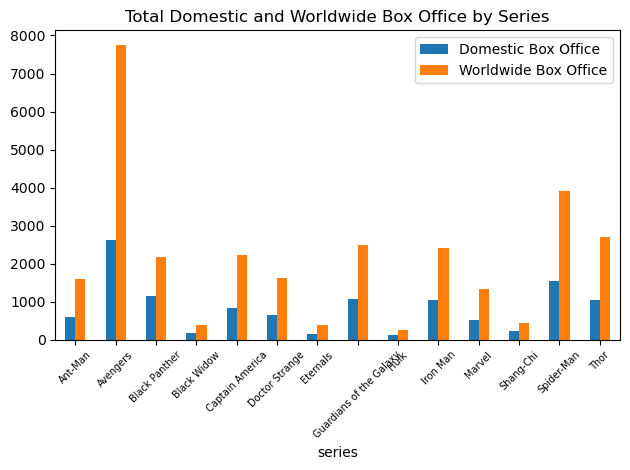

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

total_by_series.plot(kind='bar')
plt.title('Total Domestic and Worldwide Box Office by Series')
plt.xticks(rotation=45, fontsize=7) 
plt.tight_layout() 
plt.show()

In [ ]:
|